<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-valeriaarh/blob/main/Notas_Modulo5_IBM_Data_Analysis_with_Python_ValeriaRamirez_A01240716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Módulo 5 - Data Analysis with Python**

Ciencia y Analítica de datos

Alumna: Valeria Alejandra Ramirez Herrera

Matricula: A01240716

Profesor:  Dr. María de la Paz Rico / Dr. Jobish Vallikavungal

Fecha: 08/Noviembre/2022

**Nota**: Al final del documento vienen las preguntas de repaso del módulo 5, progreso general del curso, examen final y evidencia de badge.

##**Notas**

- La evaluación del modelo nos dice como se comporta nuestro modelo en la vida real.

- Cuando se hace la división en el data set, usualmente se parte:
  - Datos de entrenamiento - 70% - Esta partición nos permited contruir y entrenar el modelo, y ver cómo se comportaría el modelo predictivo.
  - Datos de prueba - 30% - Una vez que se entrena el modelo usamos esta partición.

- Python:

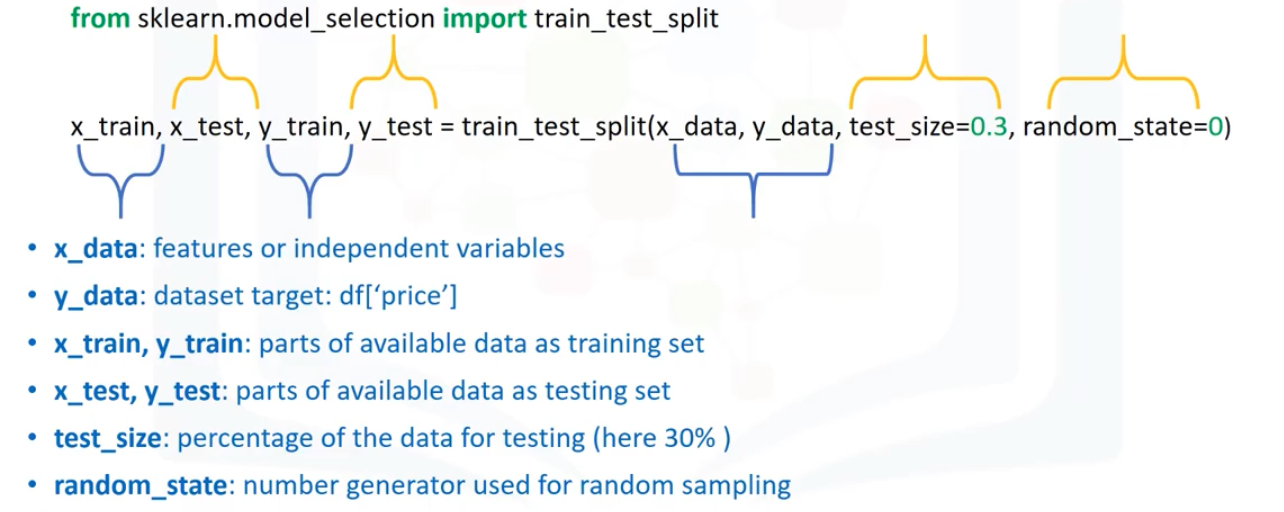

###**Model Evaluation**
Si se entrena mucho el modelo, el error generalizado puede aumentar. Todos los resultados serían diferentes cada que se entrena otro datos.

Para evitar es problema se hace la **Validación Cruzada**
Que continua con la partición del data set.

Cada partición tendrá su set de entrenamiento y su set de prueba.

###**Overfitting, Underfitting and Model Selection**

Función polinomial + ruido
- Un modelo lineal nos provee de errores ya que no hace fit con el modelo

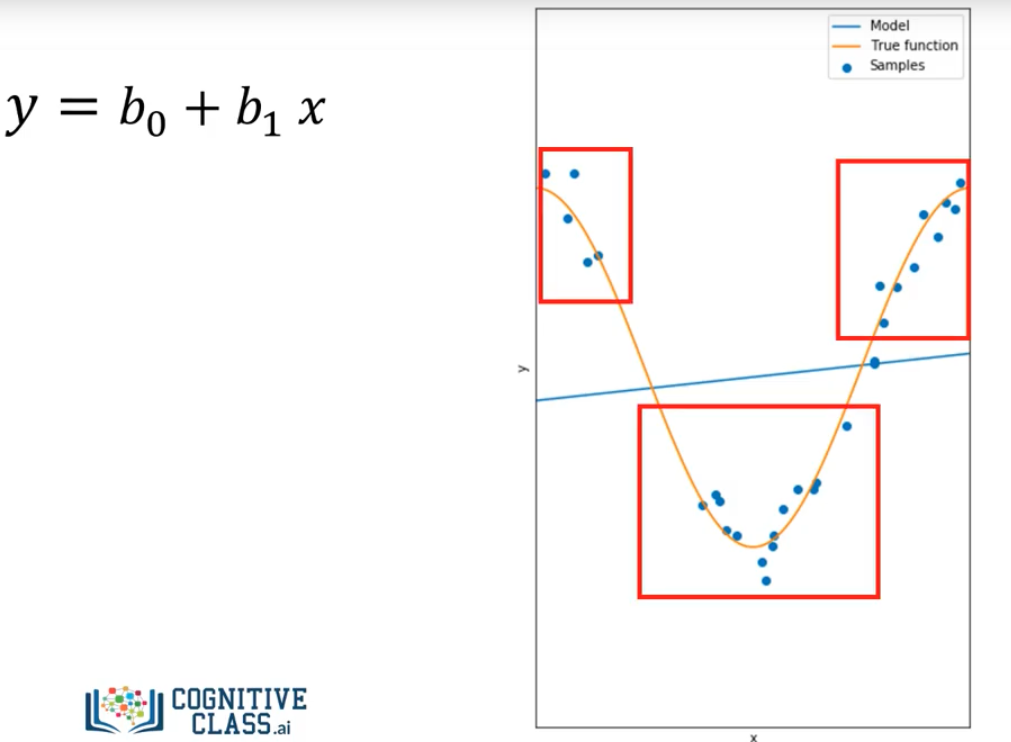

Un modelo cuadrátrico sigue arrojando errores y causando que el modelo siga sobre entrenado

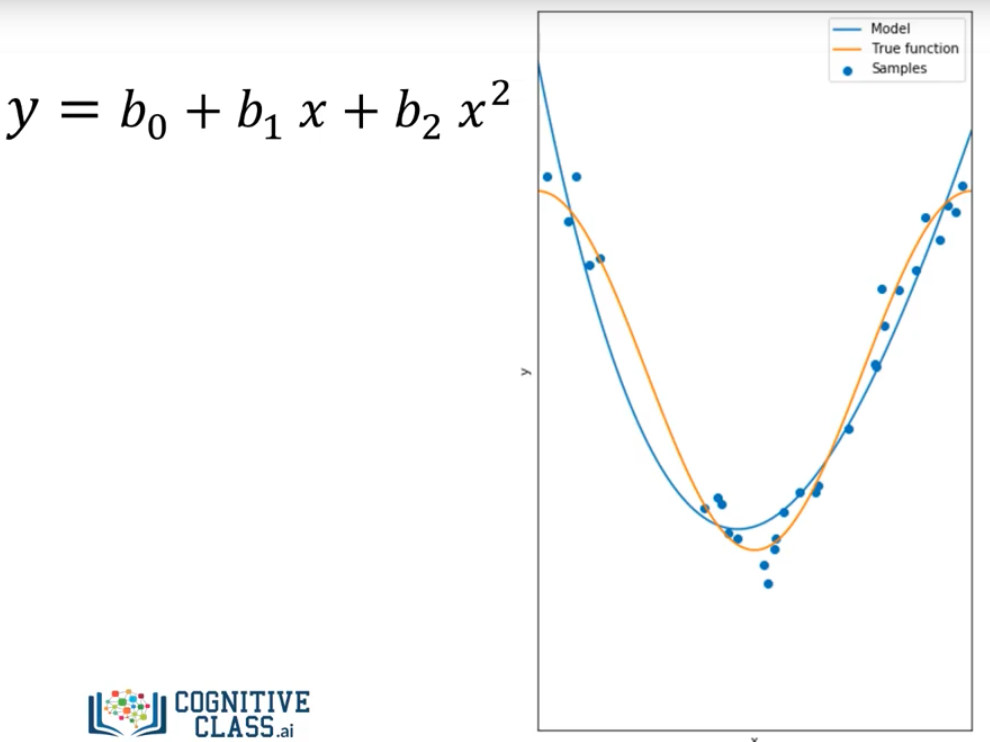


Si se sigue aumentando el orden del modelo, hasta llegar a un polinomio de orden 8, se ve que empieza a tomar mejor forma el modelo.

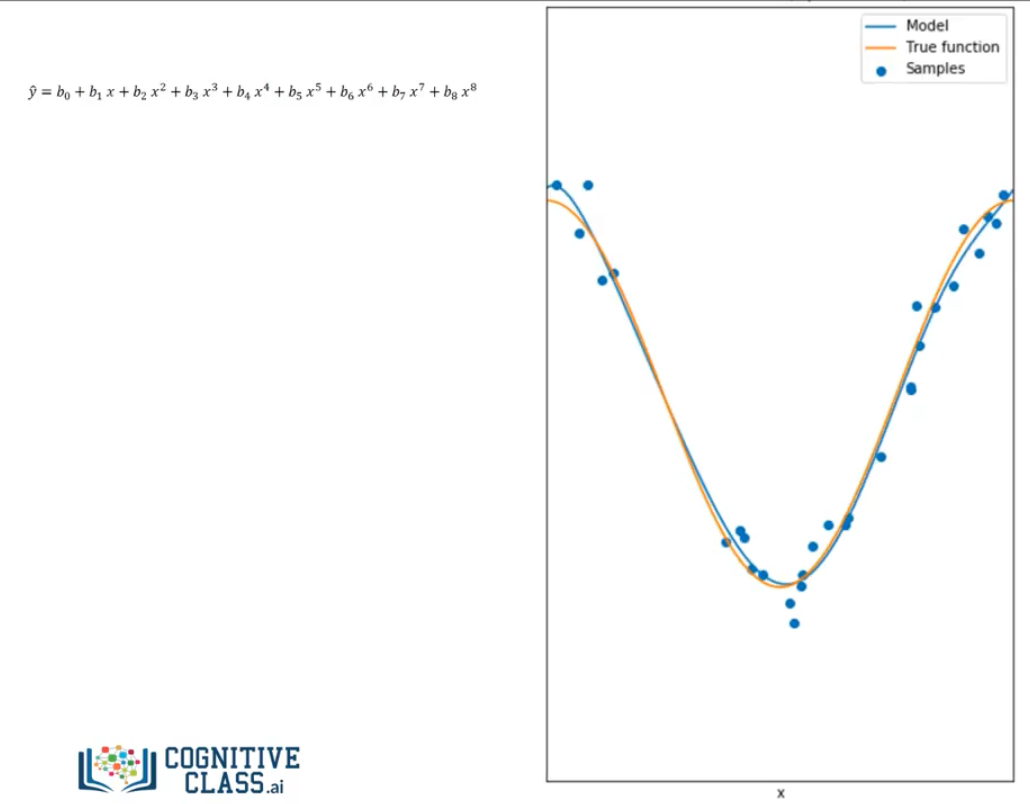

Si se sigue aumentando el orden, este caso a polinomio de orden 16, se puede ver que ya las predicciones no serían nada parecidas al modelo. Se ve que el modelo sigue los puntos de entrenamiento pero tiene un performance pobre, logrando que oscile la función junto con el error.

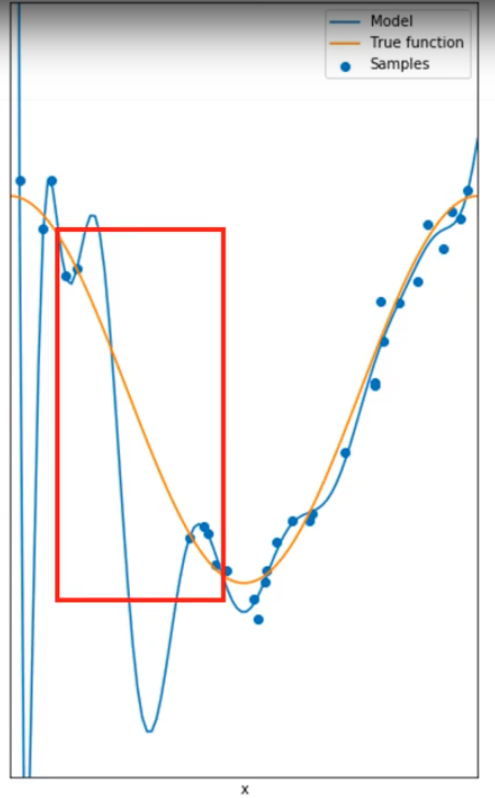



En términos de **R^2**, mientras más cercano esté a 1, mejor se comporta el modelo.

###**Ridge Regression**

Esta regresión previene que los modelos se sobre entrenen.
Casi todos los modelos tienen outliers.

Ridge controla la magnitud de los coeficientes de los polinomios, al introducir el parámetro ALPHA. este es un parametro que se selecciona antes de entrenar el modelo. Si alpha aumenta, los parámetros del modelo disminuyen. Así que se debe tener cuidado del valor que se le da a alpha.

- Python:

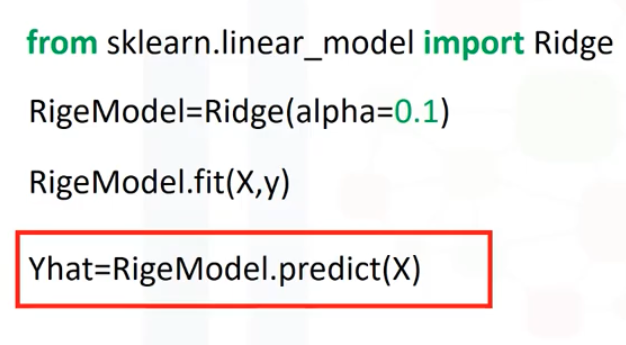


###**Grid Search**

GridSearch nos permite escanear parámetros. Aumotáticamente se hace la iteración de estos hiperparámetros y calcula el MSE y R^2 para al final darnos los mejores hiperparámetros del modelo.



##**Lab 5**

In [ ]:
!pip install xlrd # Esta libería incluye piplite

import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importación de dataset
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [ ]:
df = pd.read_csv(path)
df.to_csv(path)

#Uso de datos numéricos solamente

df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [ ]:
#Importación de librerías para gráficar

from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
#Definición de función para graficar

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data - Datos de entrenamiento 
    #testing data - Datos de prueba
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [ ]:
#PARTE 1: SE DEFINEN LAS VARIABLES DE ENTRADA...
x_data=df.drop('price',axis=1)

In [ ]:
#Y LA VARIABLE DE SALIDA
y_data = df['price']

In [ ]:
#y se hace la partición de los datos

from sklearn.model_selection import train_test_split

                                                                      #conjunto de prueba 10%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [ ]:
#PREGUNTA 1: Question #1): Use the function "train_test_split" to split up the dataset such that 40% 
#of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. 
#The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.40, random_state=0)


#Se imprimen los valores

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])


number of test samples : 81
number of training samples: 120


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Se crea el objeto de Regresión Lineal
lre=LinearRegression()

#y en base a 'horsepower'
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [ ]:
#Se calcula R^2 de prueba

lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [ ]:
#Se calcula R^2 de entrenamiento
lre.score(x_train[['horsepower']], y_train)

#Y se puede ver que es menor la del conjunto de prueba

0.6619724197515104

In [ ]:
#PREGUNTA 2: Find the R^2 on the test data using 40% of the dataset for testing.
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

In [ ]:
#Validación Cruzada
from sklearn.model_selection import cross_val_score

In [ ]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
#con 'horsepower' y 'y_data'

In [ ]:
#Resultado por default es R^2

Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [ ]:
#Se calcula/imprime el promedio y la desviación estándar
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [ ]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [ ]:
#PREGUNTA 3: Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

Rcross2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print('R^2', Rcross2)
print('The mean of the folds are', Rcross2.mean())

R^2 [0.59015621 0.44319613]
The mean of the folds are 0.5166761697127429


In [ ]:
#Método de validación cruzada para predecir

from sklearn.model_selection import cross_val_predict

In [ ]:
#Con 'horsepower

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [ ]:
#PARTE 2: OVERFITTING, UNDERFITTING AND MODEL SELECTION
#Se crean objetos de Regresión Lineal Múltiple
# con 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg' 

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [ ]:
#Se hace la predicción con los datos de entrenamiento
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [ ]:
#Se hace la predicción con los datos de prueba
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


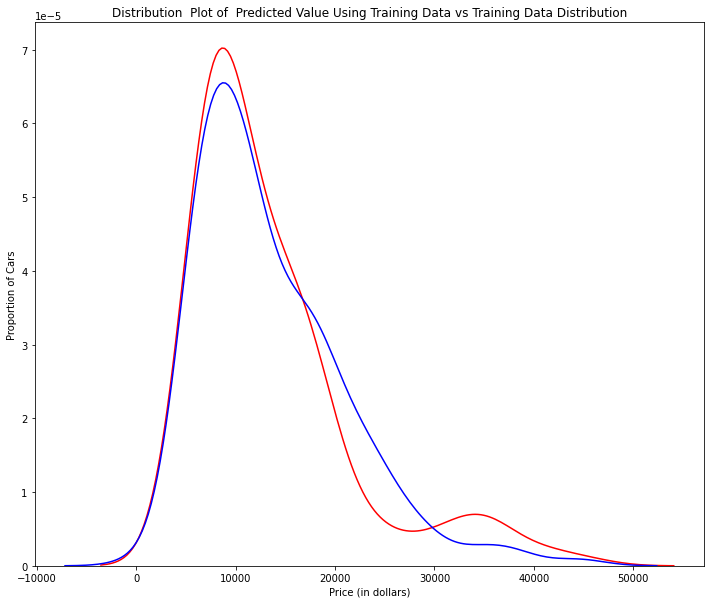

In [ ]:
#Se hace la evaluación a través de la gráfica

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


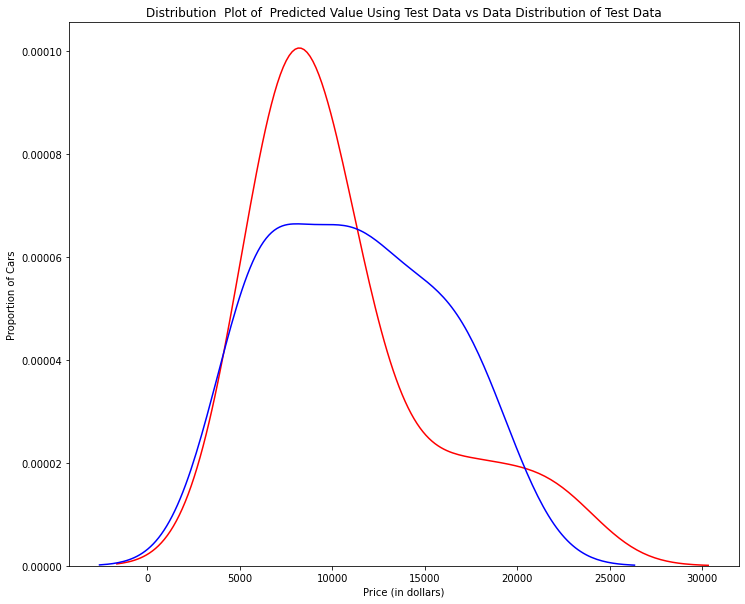

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Se hace una nueva partición de los datos
#con 55% para entrenamiento y el resto de prueba

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [ ]:
#Se crea un polinomio grado 5
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [ ]:
#Se crea el modelo de Regresión Lineal y se entrena
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [ ]:
#Se hace la comparacion de los valores predecidos vs reales
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


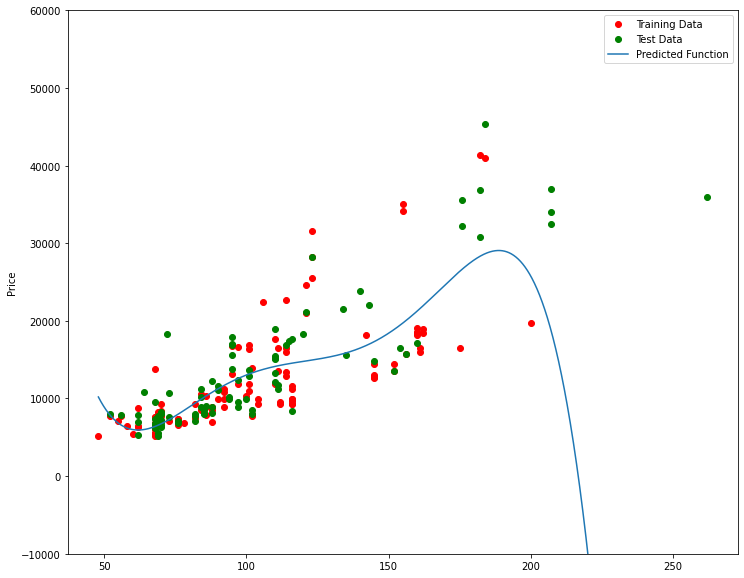

In [ ]:
#Se grafica

PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [ ]:
#Se calcula el R2 de los datos de entrenamiento y de prueba
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test)) # Como es negativo se 
#es senal de sobre entrenamiento

0.556771690212023
-29.87134030204415


Text(3, 0.75, 'Maximum R^2 ')

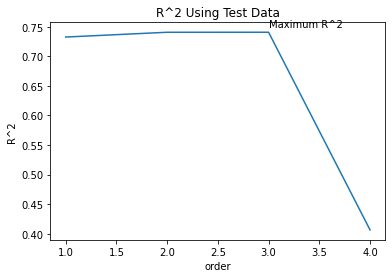

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [ ]:
#Función interactiva para jugar con el grado
#de los polinomios y la cantidad de datos

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [ ]:
#PREGUNTA 4A: We can perform polynomial transformations with more than one feature. 
#Create a "PolynomialFeatures" object "pr1" of degree two.

#PREGUNTA 4B: Transform the training and testing samples for the features 'horsepower', 
#'curb-weight', 'engine-size' and 'highway-mpg'. 
#Hint: use the method "fit_transform".

pr1 = PolynomialFeatures(degree=2) 
x_train_pr1 = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
x_test_pr1 = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
pr1

PolynomialFeatures()

In [ ]:
#PREGUNTA 4C: How many dimensions does the new feature have? 
#Hint: use the attribute "shape".

x_train_pr1.shape


(110, 70)

In [ ]:
#PREGUNTA 4D: Create a linear regression model "poly1". 
#Train the object using the method "fit" using the polynomial 
#features.

poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


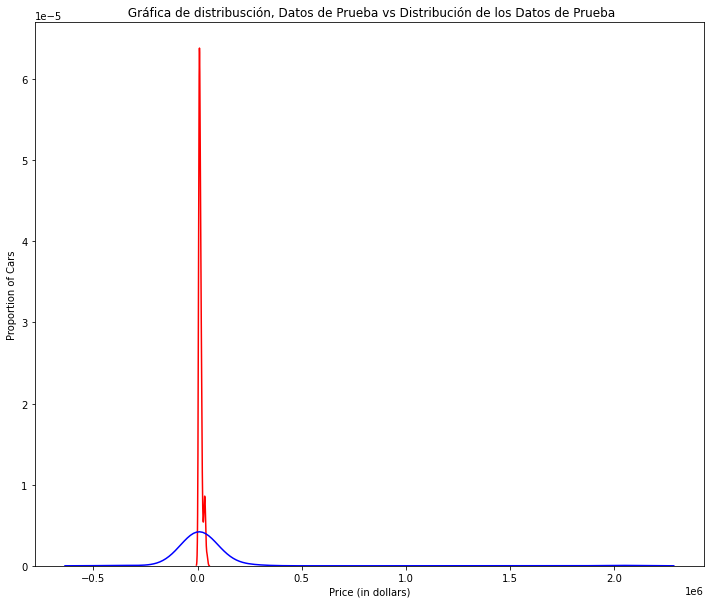

In [ ]:
#PREGUNTA 4E: Use the method "predict" to predict an output on the polynomial features, 
#then use the function "DistributionPlot" to display the distribution of the 
#predicted test output vs. the actual test data.

yhat_test1=poly1.predict(x_test_pr1)

Title=' Gráfica de distribusción, Datos de Prueba vs Distribución de los Datos de Prueba'
DistributionPlot(y_test, yhat_test1, "Valor Actual (Test)", "Valor Predecido (Test)", Title)


In [ ]:
#PARTE 3: RIDGE REGRESSION

#Se hace una transformación de datos a un polinomio de grado 2:

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
#Regresión del objeto de Ridge con alhpa =1
RigeModel=Ridge(alpha=1)

In [ ]:
#Fit del modelo
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [ ]:
#Se obtiene la predicción

yhat = RigeModel.predict(x_test_pr)

In [ ]:
#Se imprimen los valores
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 134.18it/s, Test Score=0.564, Train Score=0.859]


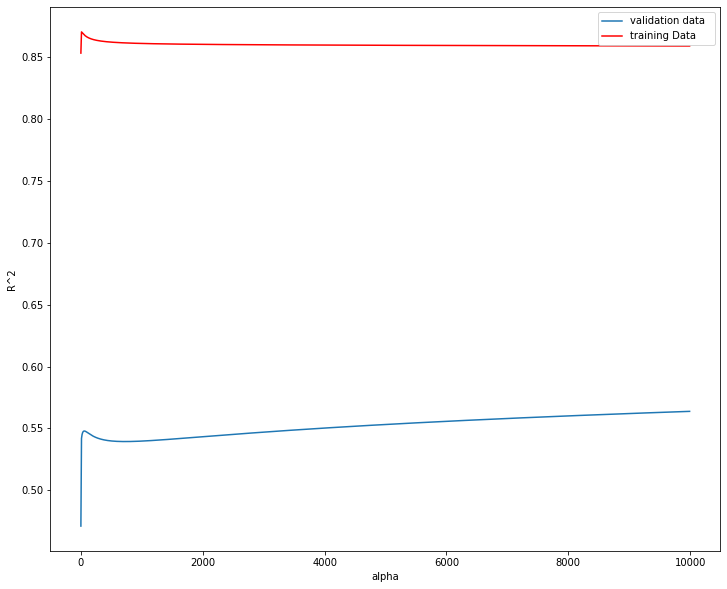

In [ ]:
#Gráfico para diferentes valores de alpha

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [ ]:
#PREGUNTA 5: Perform Ridge regression. Calculate the R^2 using the polynomial features, 
#use the training data to train the model and use the test data to test the model. 
#The parameter alpha should be set to 10.

RigeModel2=Ridge(alpha=10)
RigeModel2.fit(x_train_pr, y_train)
RigeModel2.score(x_test_pr, y_test)

0.5418576440206702

In [ ]:
#PARTE 4: GRID SEARCH

from sklearn.model_selection import GridSearchCV

In [ ]:
#Se crea el diccionario con vario valores par alpha
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [ ]:
#Objeto

RR=Ridge()
RR

Ridge()

In [ ]:
#Y se hace la búsqueda del mejor alpha

Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [ ]:
#Fit del modelo 
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [ ]:
#Se encuentra el mejor alpha
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [ ]:
#Validación

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

##**Review Questions**

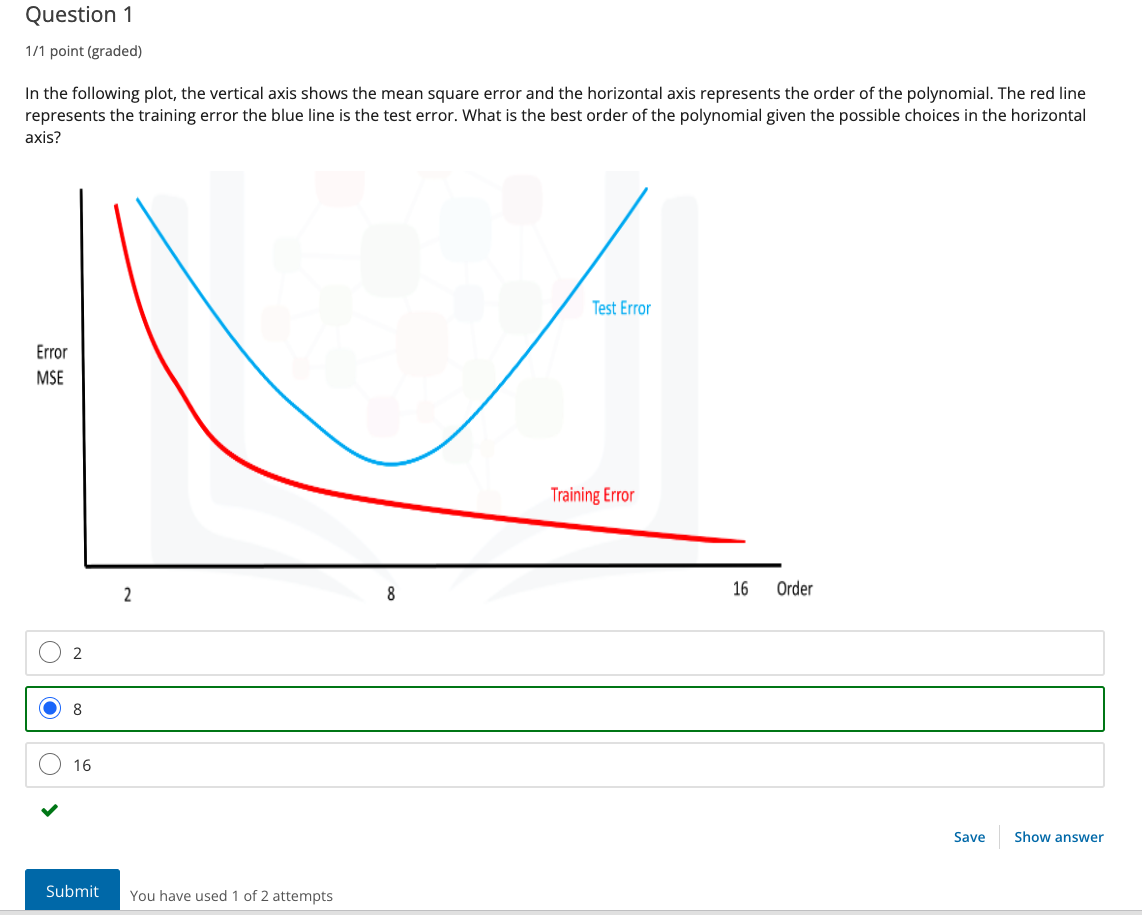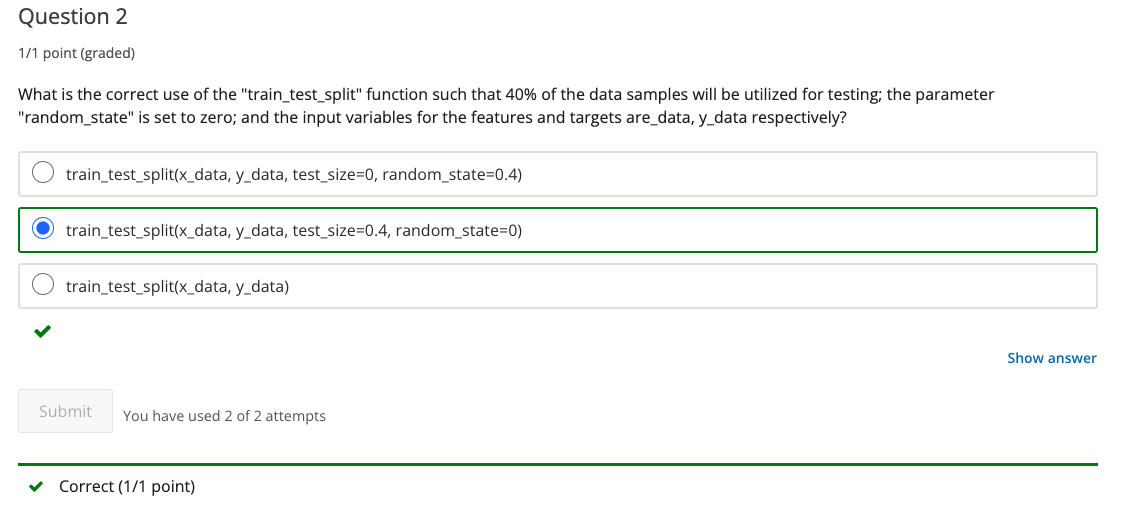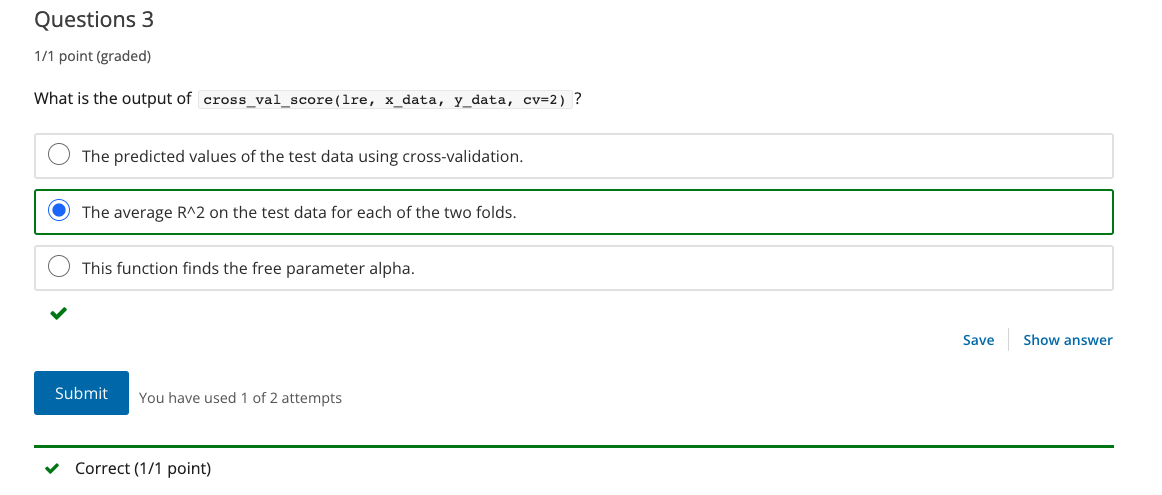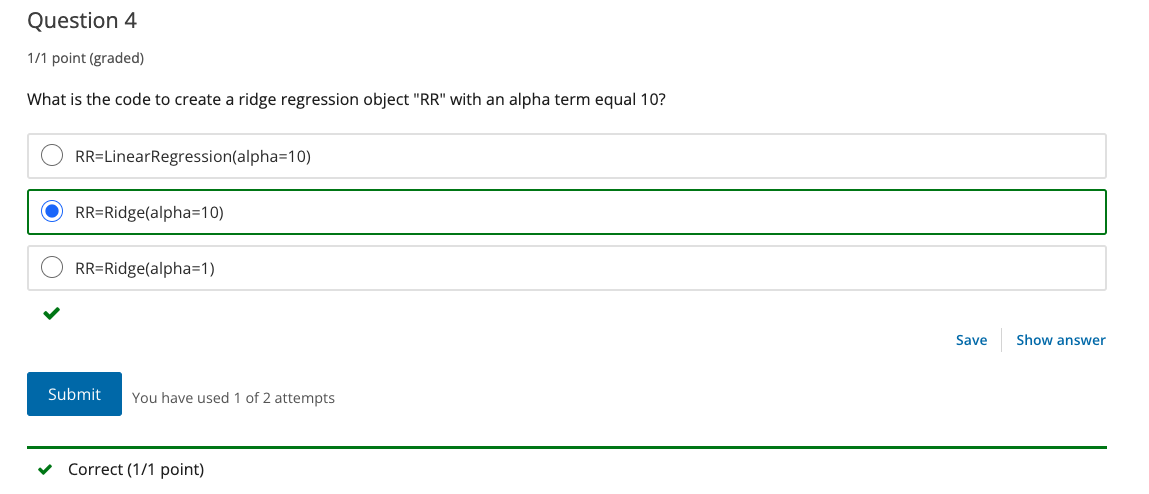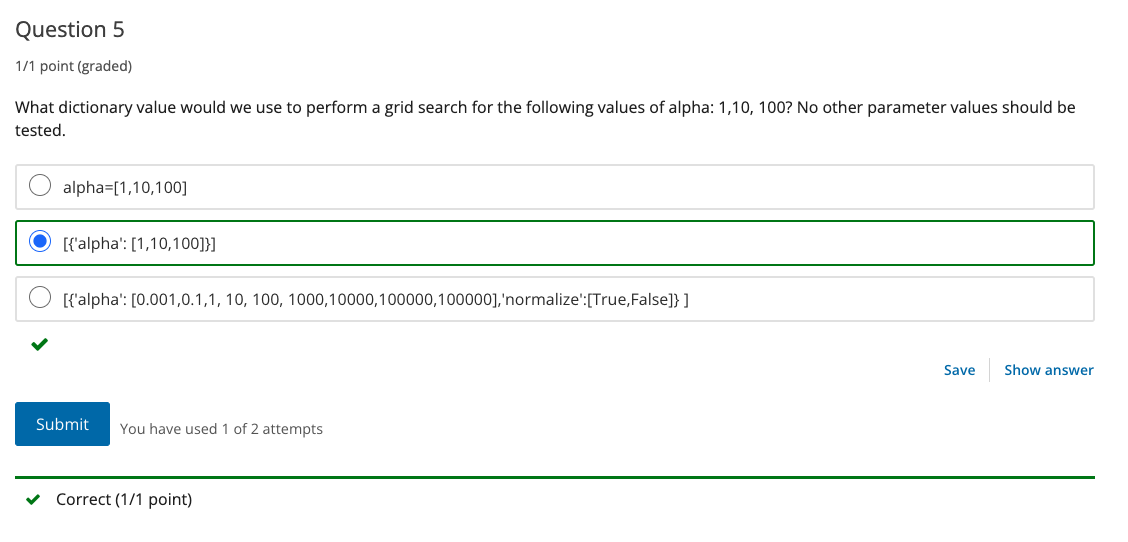

##**Examen Final**


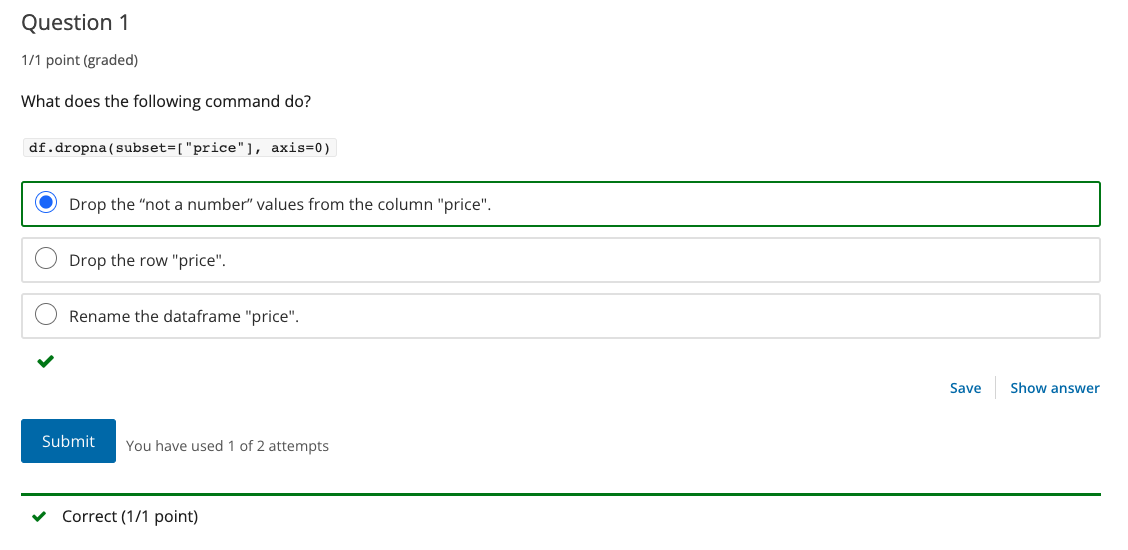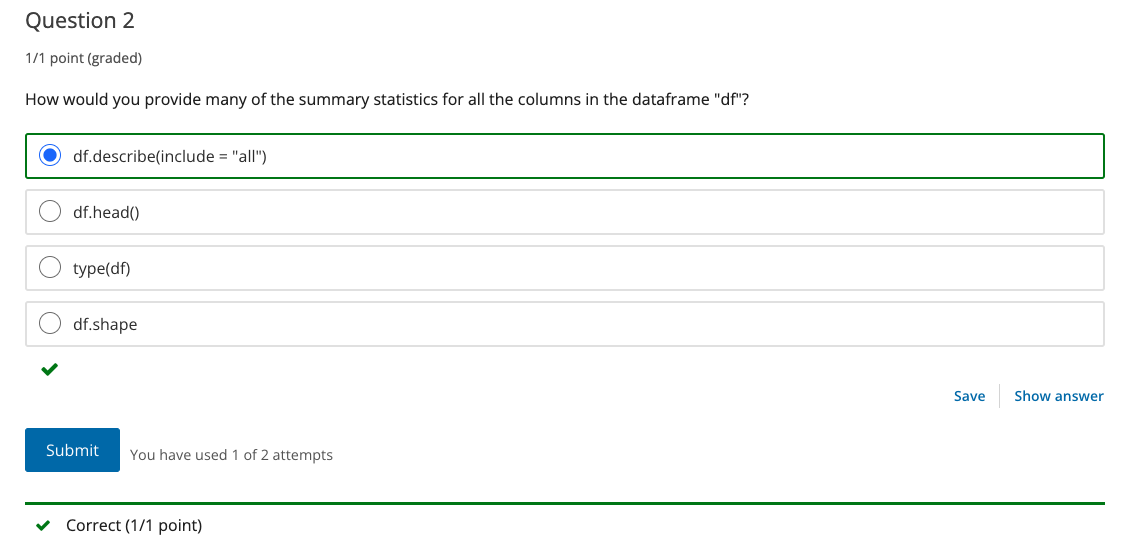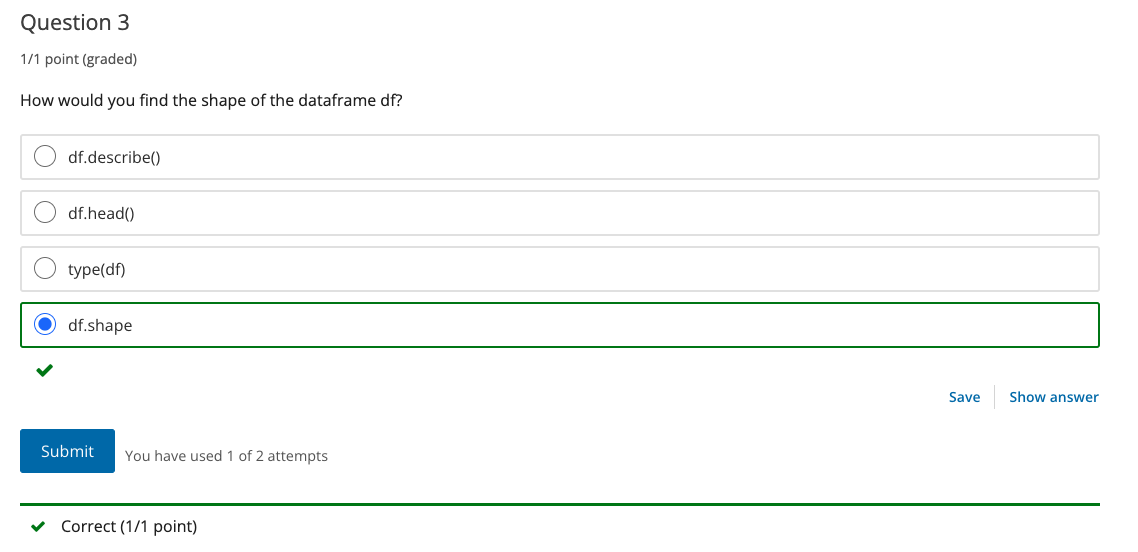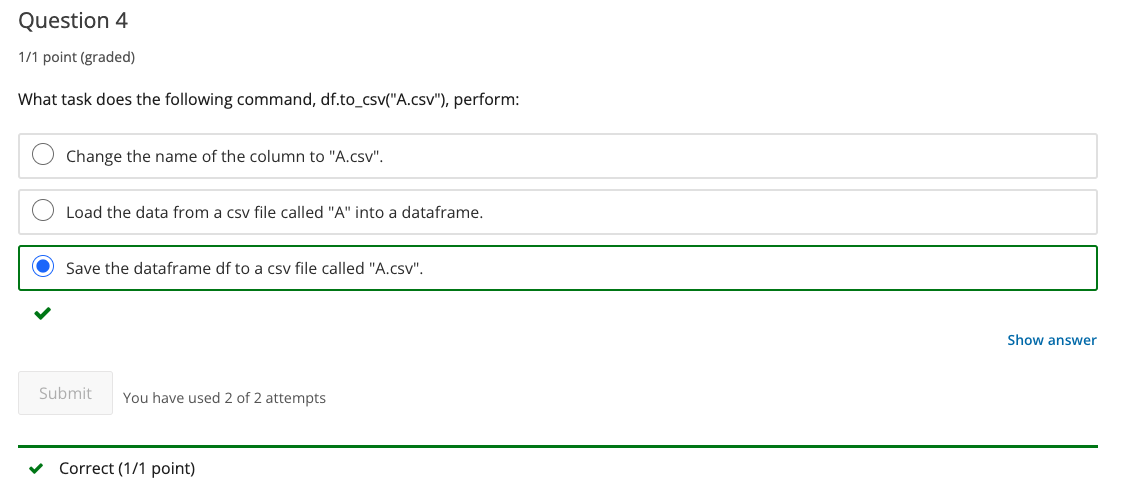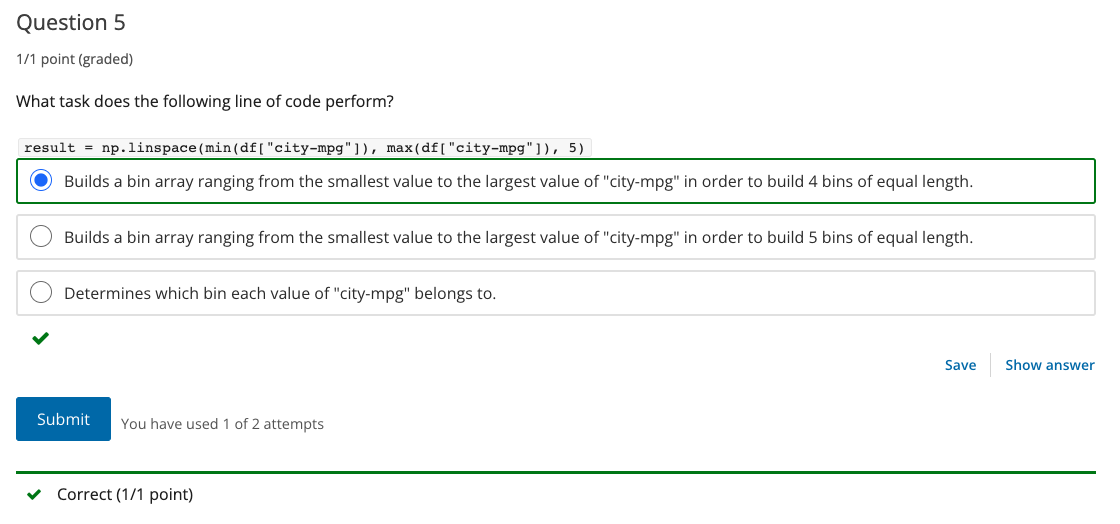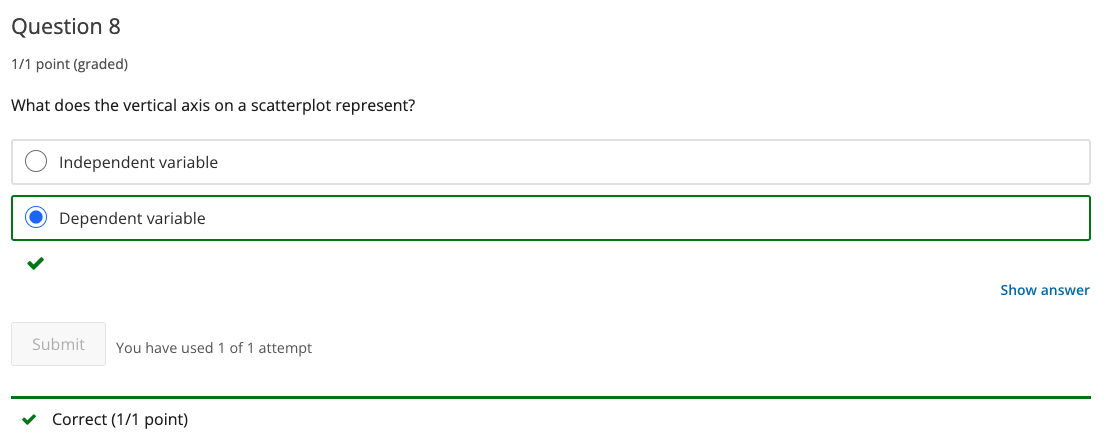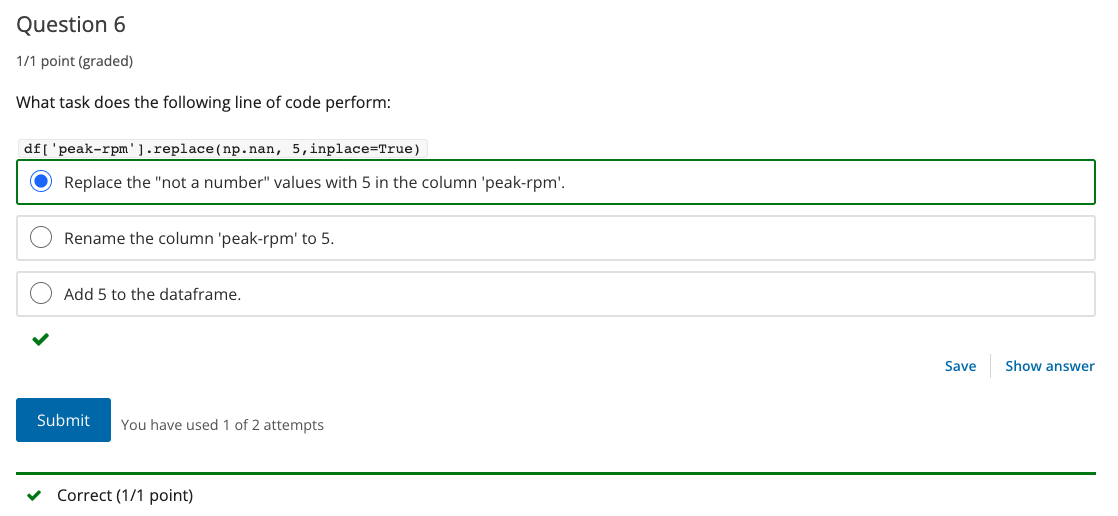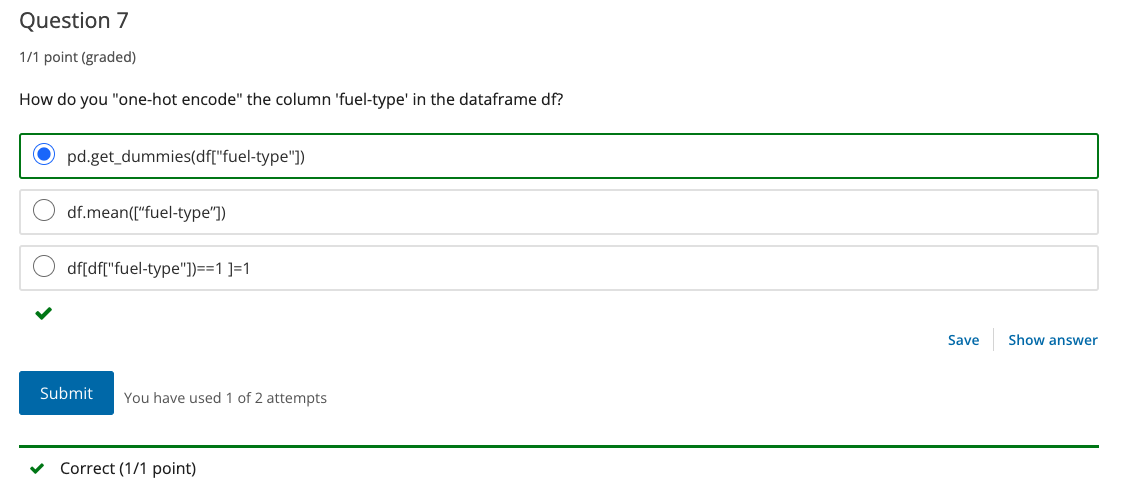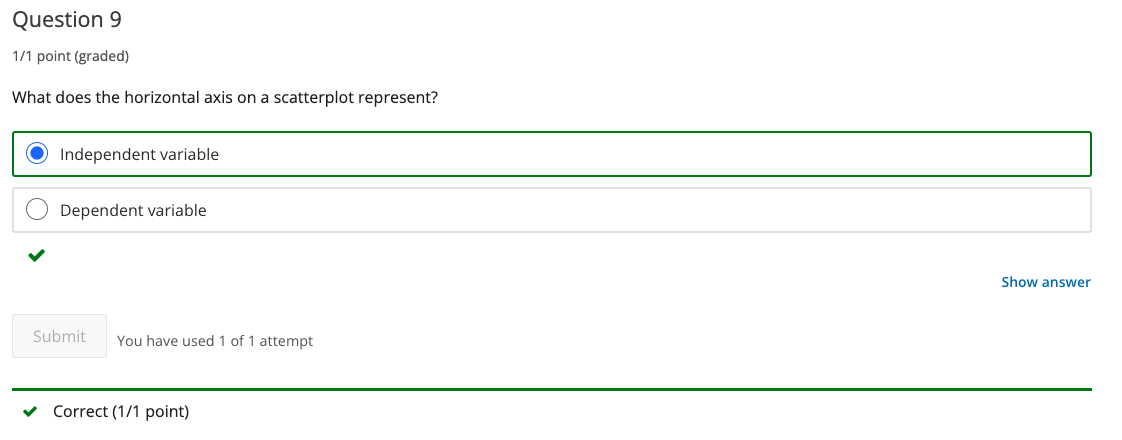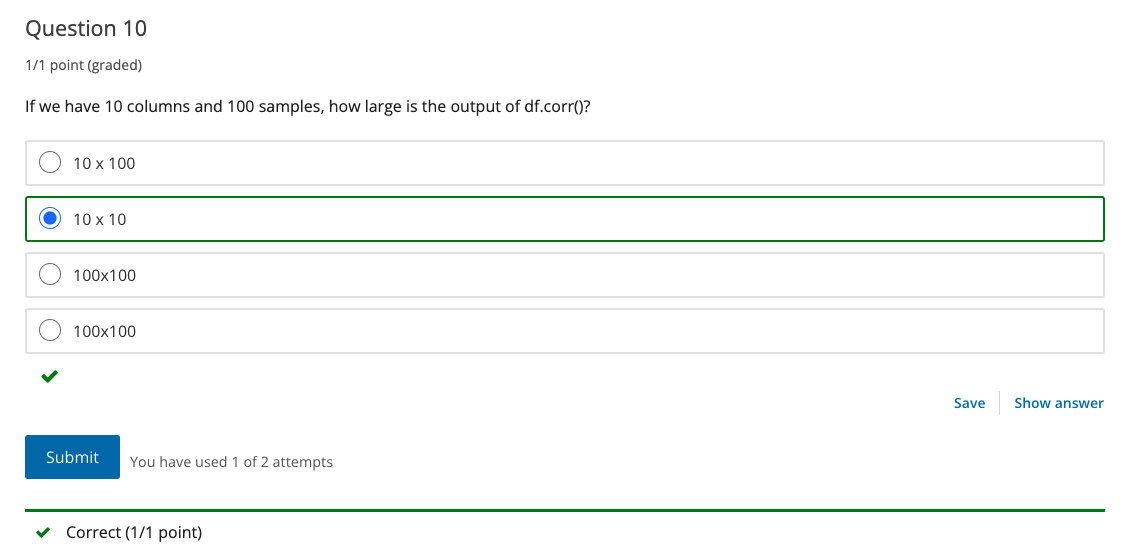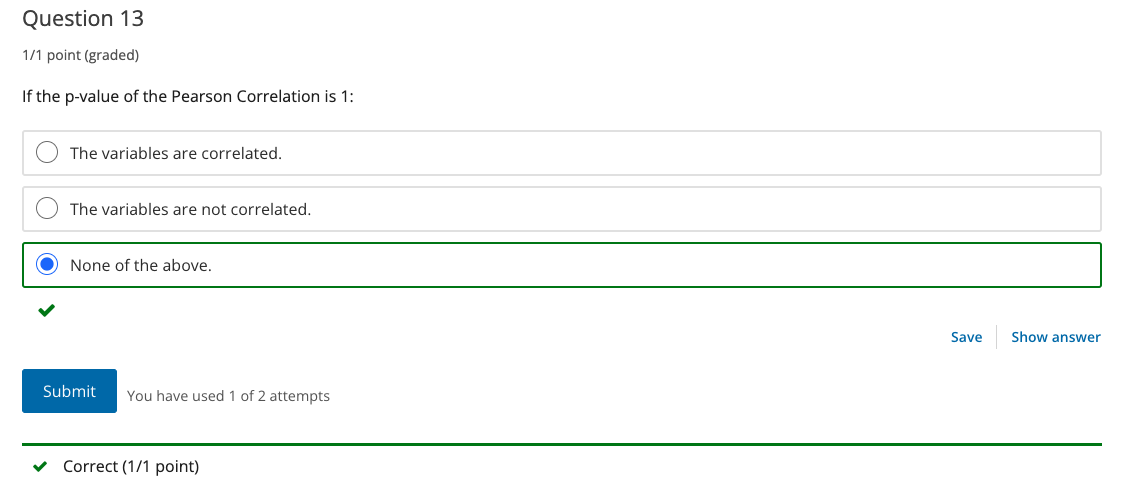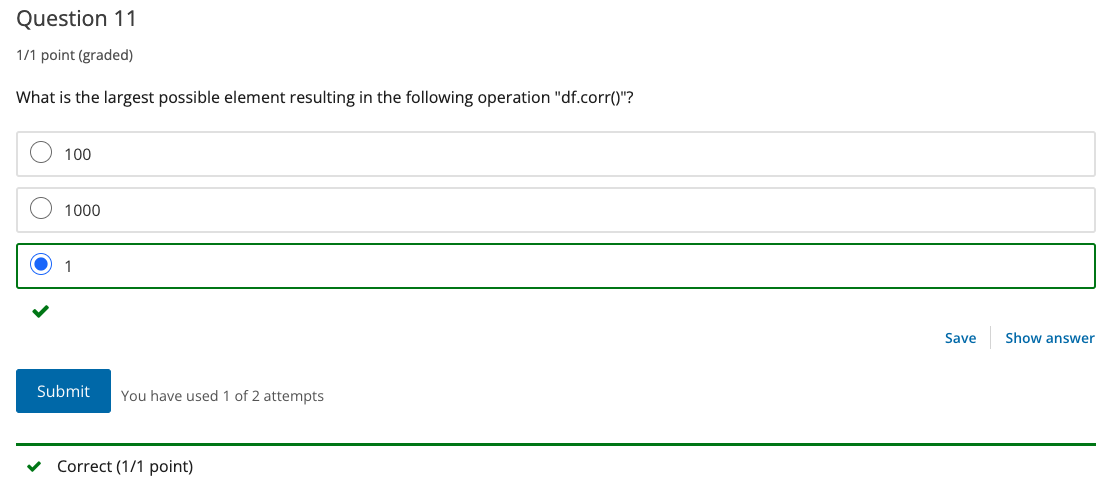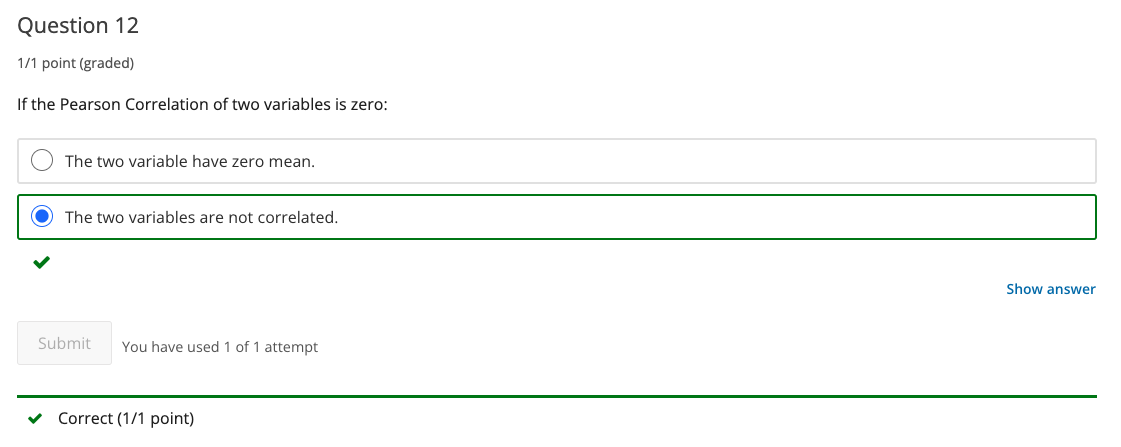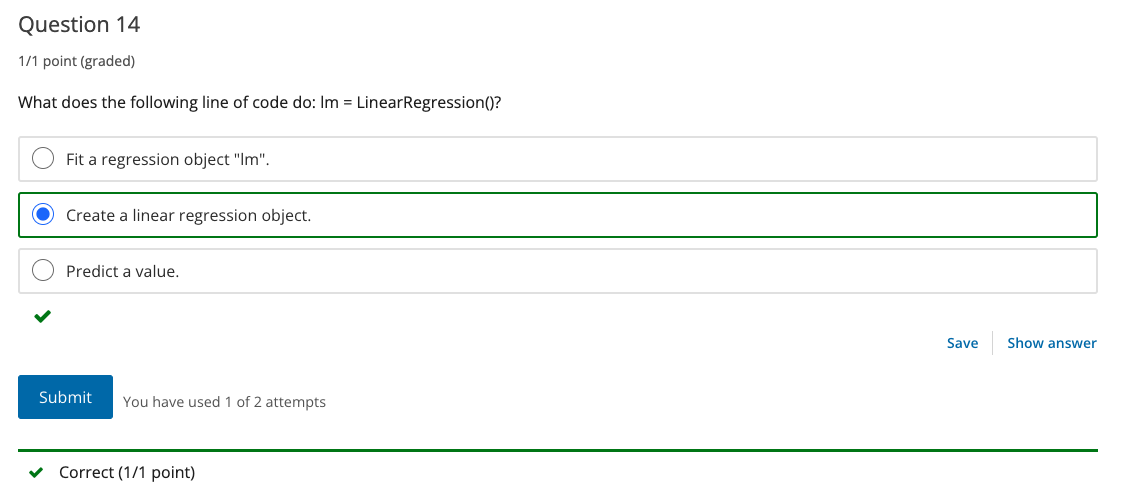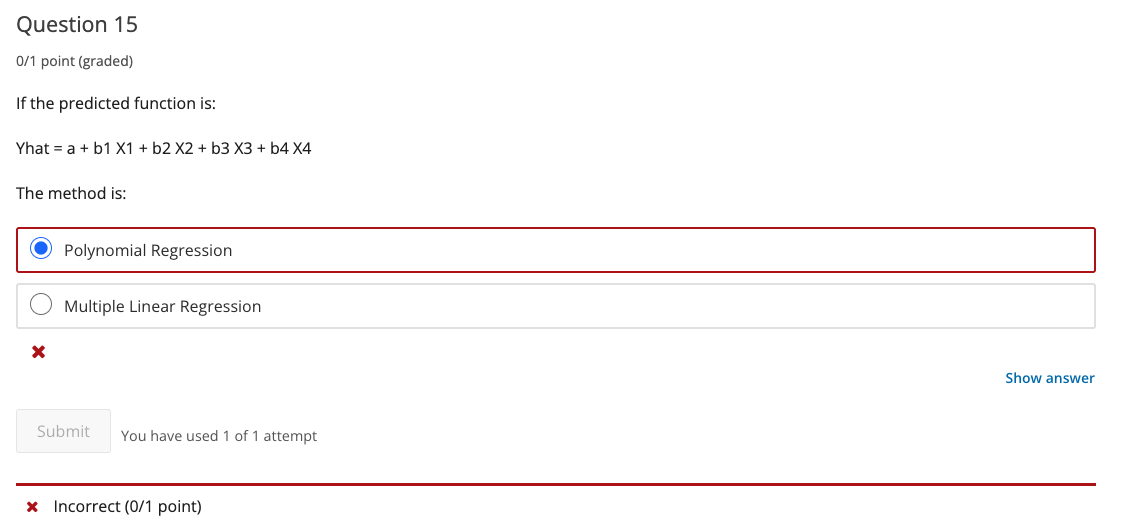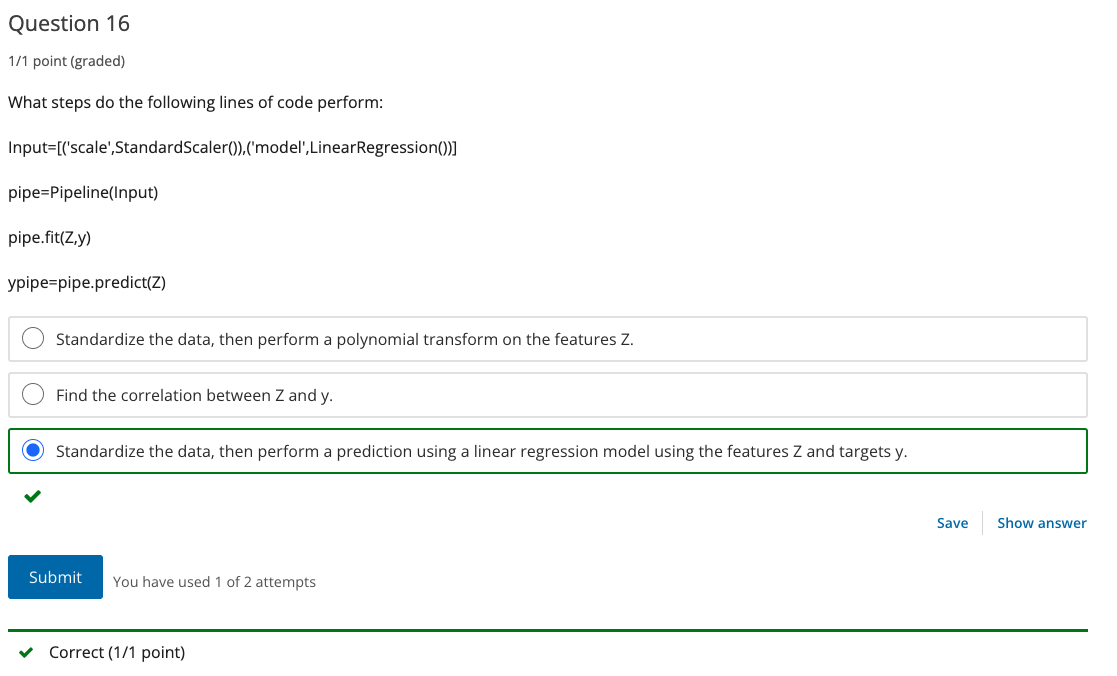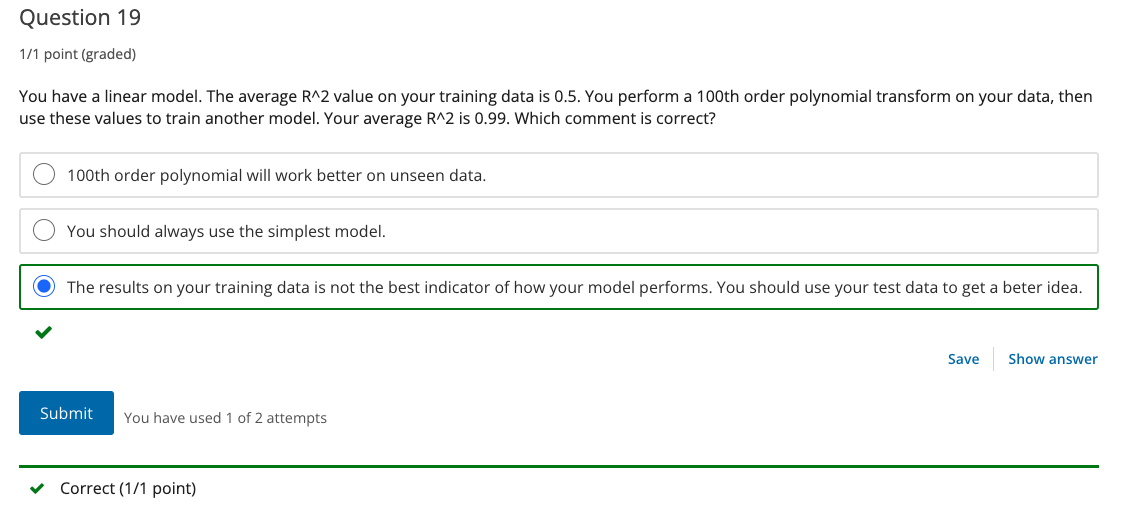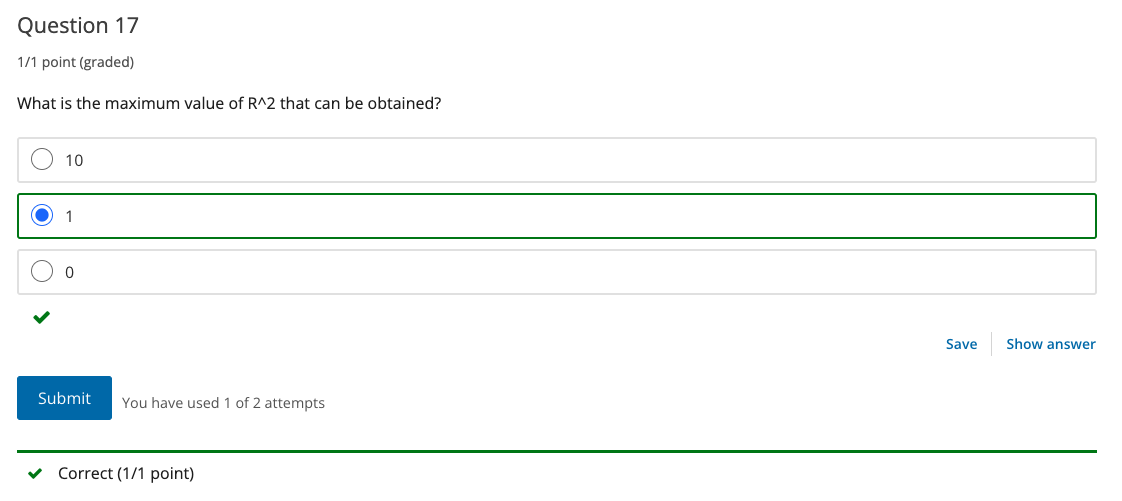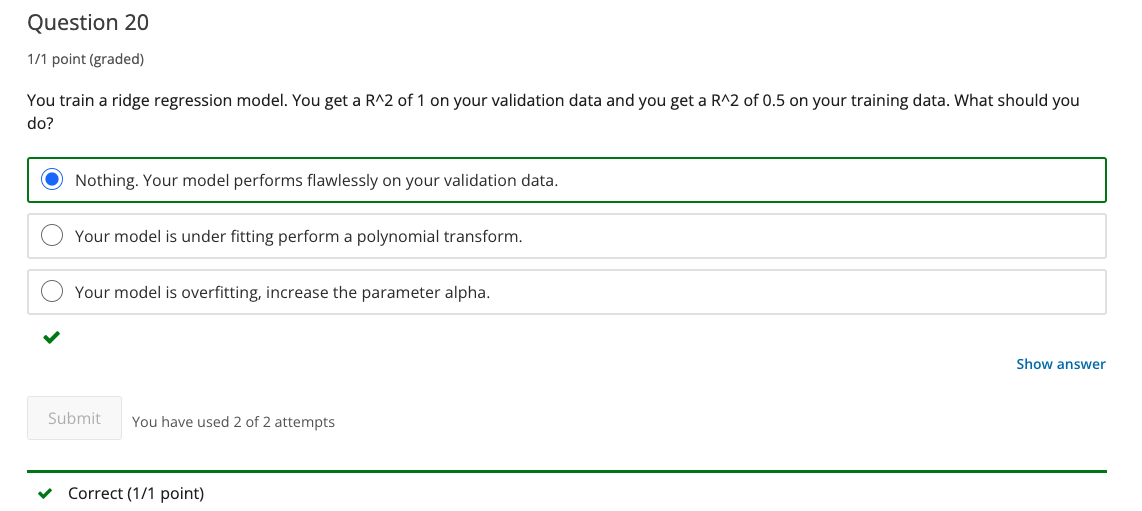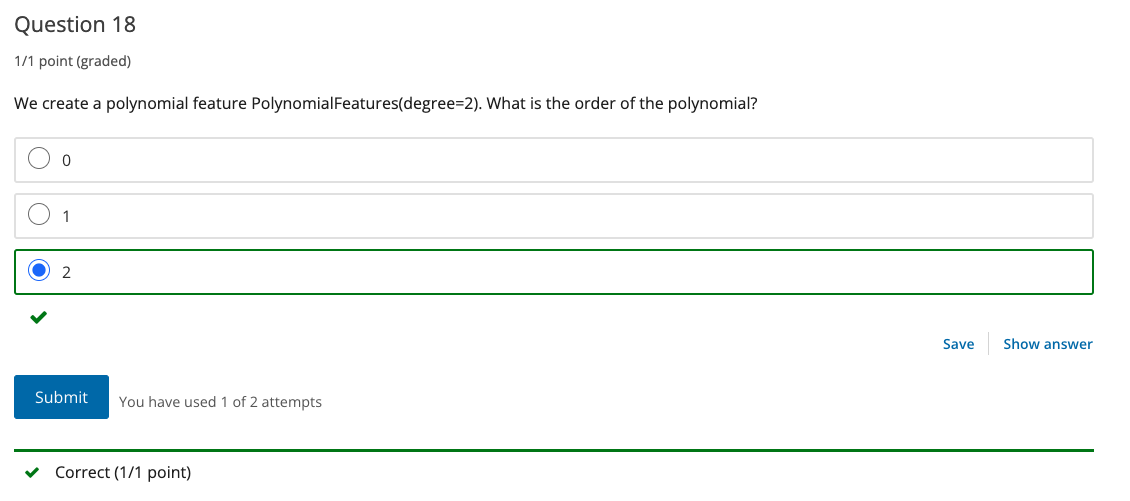

##**Progreso General**

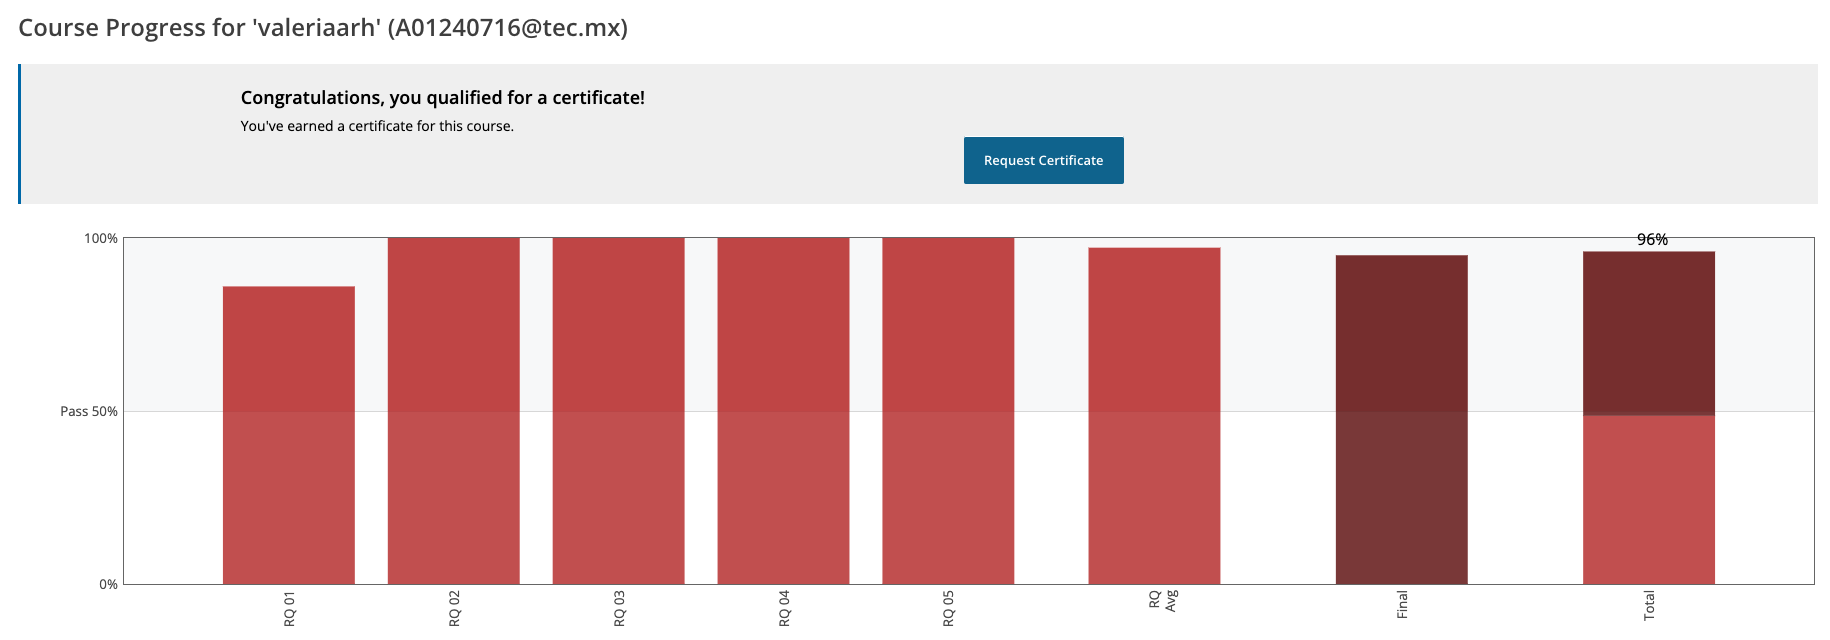

##**Certificate**

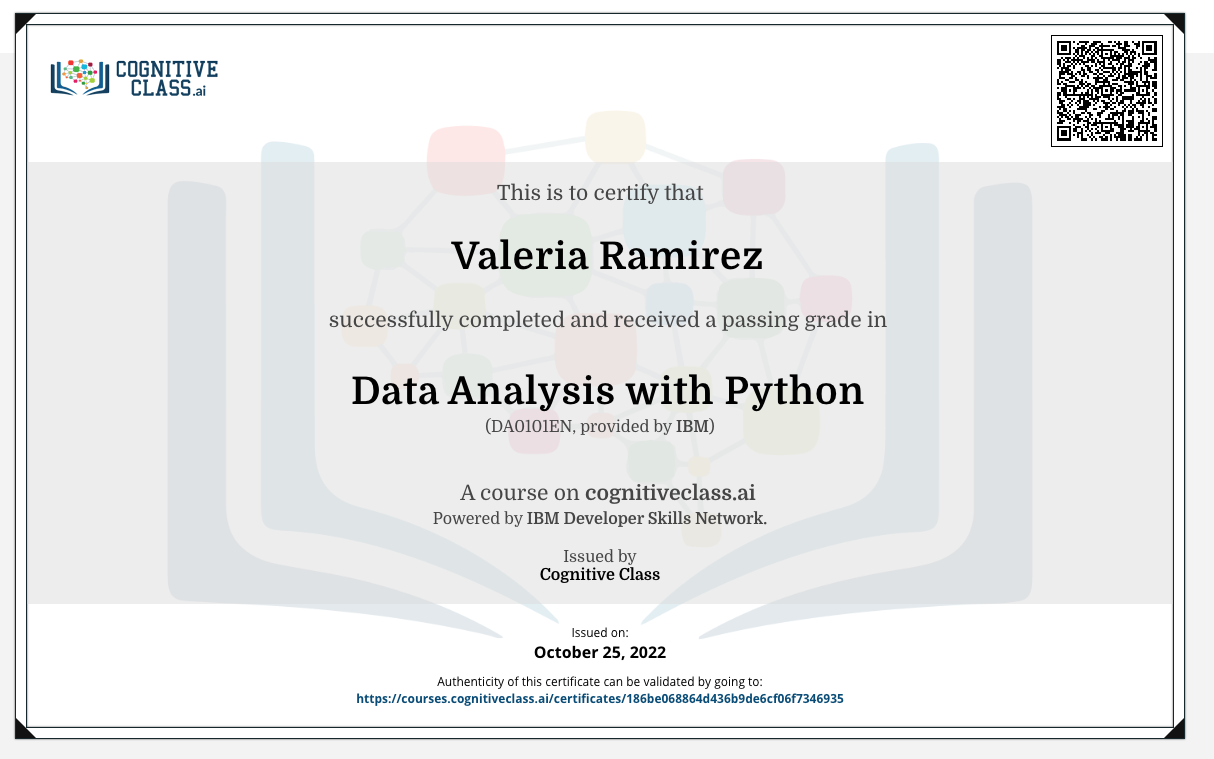

##**Badge**

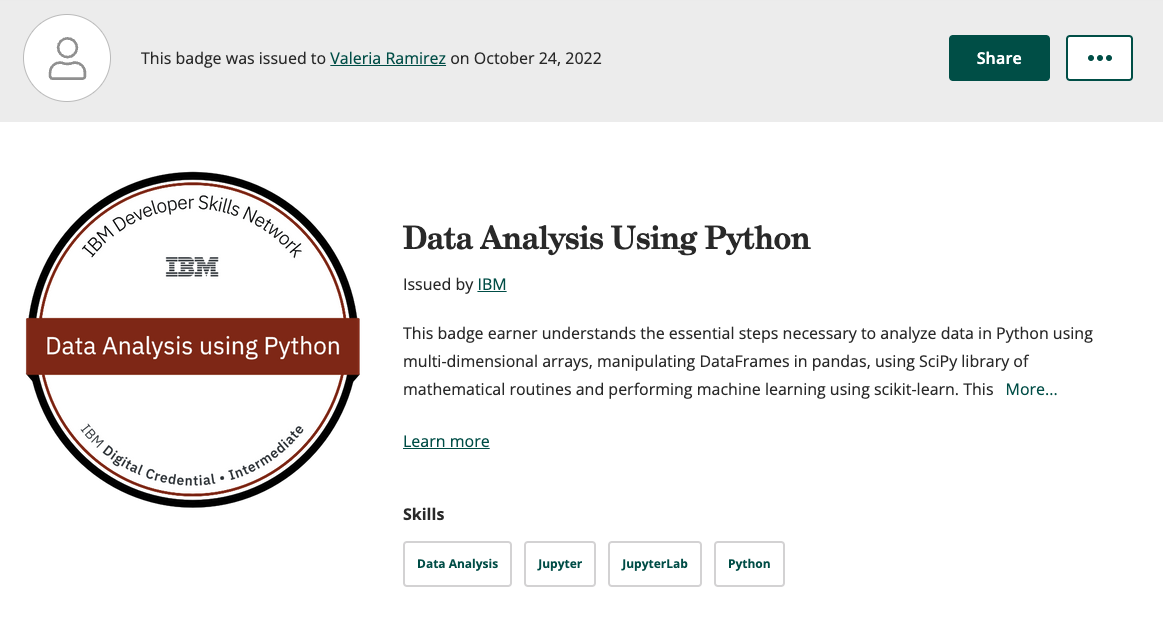